In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv.zip')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:

print("🔍 Dataset Info:\n")
print(df.info())

print("\n❓ Missing Values:\n")
print(df.isnull().sum())

print("\n📊 Class Distribution:\n")
print(df['Class'].value_counts())


🔍 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


X = df.drop('Class', axis=1)
y = df['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


print("📊 Class distribution before SMOTE:")
print(y.value_counts())

print("\n📊 Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


📊 Class distribution before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64

📊 Class distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("🔷 Logistic Regression Report:\n")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

🔷 Logistic Regression Report:

[[55361  1389]
 [ 4289 52687]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("🔷 Decision Tree Report:\n")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

🔷 Decision Tree Report:

[[56605   145]
 [   58 56918]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

print("🔷 Neural Network Report:\n")
print(confusion_matrix(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))

🔷 Neural Network Report:

[[56721    29]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


iso_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_iforest = iso_forest.fit_predict(X_scaled)


y_pred_iforest = [1 if x == -1 else 0 for x in y_pred_iforest]

print("🔹 Isolation Forest Results:")
print(confusion_matrix(y, y_pred_iforest))
print(classification_report(y, y_pred_iforest))


🔹 Isolation Forest Results:
[[281755   2560]
 [   203    289]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.59      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807



In [ ]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 858.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have ten

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_scaled, X_scaled, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

reconstructions = autoencoder.predict(X_scaled)
mse = tf.keras.losses.mse(X_scaled, reconstructions).numpy()
threshold = mse.mean() + 3 * mse.std()


y_pred_auto = [1 if e > threshold else 0 for e in mse]

print("🔹 Autoencoder Results:")
print(confusion_matrix(y, y_pred_auto))
print(classification_report(y, y_pred_auto))


Epoch 1/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9119 - val_loss: 0.7111
Epoch 2/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6220 - val_loss: 0.6301
Epoch 3/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5770 - val_loss: 0.5951
Epoch 4/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5423 - val_loss: 0.5685
Epoch 5/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5248 - val_loss: 0.5583
Epoch 6/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5129 - val_loss: 0.5446
Epoch 7/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4974 - val_loss: 0.5390
Epoch 8/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4919 - val_loss: 0.5359
Epoch 9/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4845 - val_loss: 0.5332
Epoch 10/10
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4830 - val_loss: 0.5312
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
🔹 Autoencoder Results:
[[283675    640]
 [   469     23]]
              precision    recall  f1

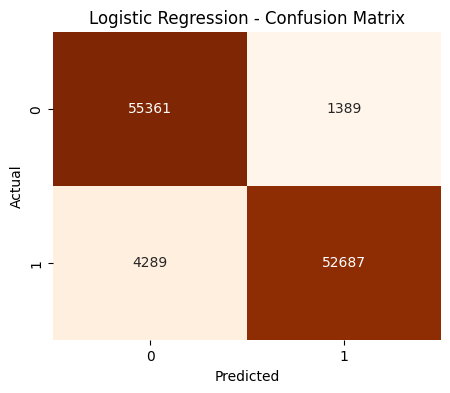

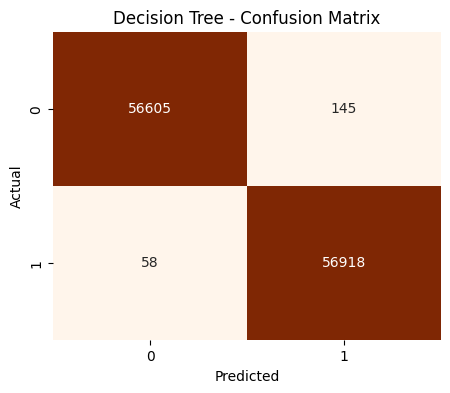

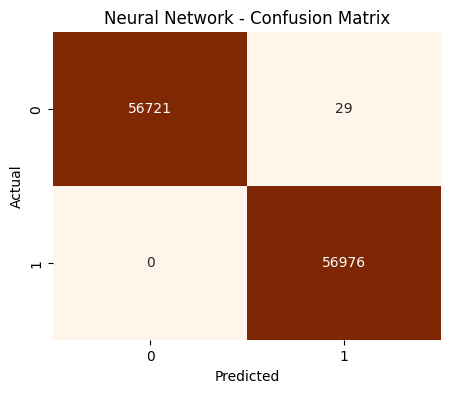

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


plot_confusion("Logistic Regression", y_test, lr_pred)
plot_confusion("Decision Tree", y_test, dt_pred)
plot_confusion("Neural Network", y_test, mlp_pred)


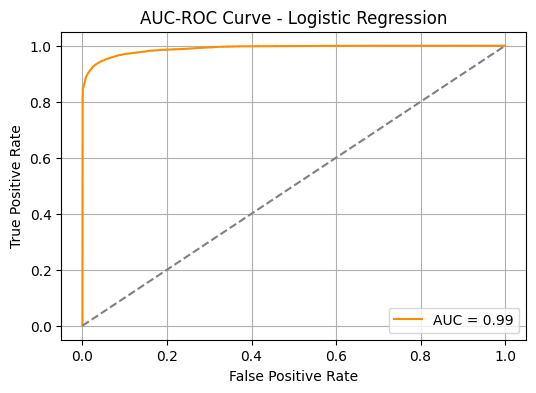

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_prob = lr.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_prob)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('AUC-ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-24-2395171501>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


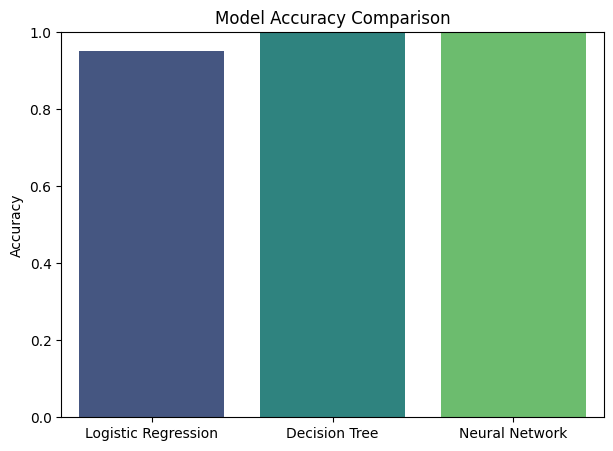

In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns

models = ['Logistic Regression', 'Decision Tree', 'Neural Network']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, mlp_pred)
]

plt.figure(figsize=(7, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


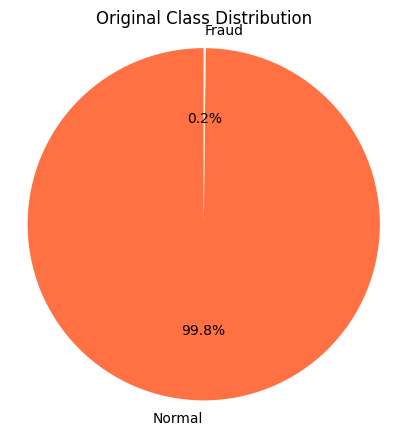

In [ ]:
import matplotlib.pyplot as plt

labels = ['Normal', 'Fraud']
sizes = y.value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff7043' ,'#fff3e0'])
plt.title("Original Class Distribution")
plt.axis('equal')
plt.show()

